<a href="https://colab.research.google.com/github/AryaWardana/tugas1_datamining/blob/main/CheckPoint3_arya_wahyu_wardana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mall visiting customer**

# **Import Libary**

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # Algoritma C4.5
from sklearn.preprocessing import StandardScaler

#**BUSINESS UNDERSTANDING**

**Business Objective**

Tujuan utama adalah memahami dan memprediksi perilaku pelanggan di mal untuk meningkatkan pengalaman berbelanja secara keseluruhan dan meningkatkan penjualan bagi pengecer. Ini termasuk memahami faktor-faktor yang mendorong kunjungan pelanggan, durasi tinggal, dan kemungkinan pembelian selama setiap kunjungan.

**Assess Situationt**

Saat ini, manajemen mal kurang memiliki wawasan rinci tentang perilaku pelanggan. Mereka ingin tahu lebih banyak tentang demografi pelanggan, preferensi, dan pola untuk menyesuaikan layanan dan promosi dengan lebih baik. Selain itu, memahami jam kunjungan puncak dan area populer di dalam mal dapat membantu mengoptimalkan penataan dan tata letak.

**Data Minning Goals**

- Segmentasi Pelanggan: Identifikasi segmen pelanggan yang berbeda berdasarkan demografi, frekuensi kunjungan, dan kebiasaan pengeluaran.

- Penambangan Aturan Asosiasi: Tentukan toko mana yang sering dikunjungi bersama dan promosi mana yang paling efektif.

- Analitika Prediktif: Prediksi pelanggan mana yang mungkin mengunjungi mal, berapa lama mereka akan tinggal, dan berapa banyak uang yang mungkin mereka habiskan.

- Sistem Rekomendasi: Sarankan penawaran personalisasi atau rekomendasi toko berdasarkan perilaku masa lalu.

**Prjocect Plan**

- Pengumpulan Data: Kumpulkan data tentang kunjungan pelanggan, transaksi, dan demografi dari basis data mal dan program loyalitas.

- Pra-pemrosesan Data: Bersihkan dan siapkan data untuk analisis, termasuk menangani nilai yang hilang dan outlier.

- Analisis Data Eksploratif: Pahami distribusi data, korelasi, dan tren.

- Modeling: Terapkan berbagai teknik penambangan data seperti pengelompokan, penambangan aturan asosiasi, dan pemodelan prediktif.

- Evaluasi: Evaluasi kinerja model menggunakan metrik seperti akurasi, presisi, dan recall.

- Implementasi: Implementasikan temuan dan rekomendasi ke dalam operasi mal, strategi pemasaran, dan inisiatif keterlibatan pelanggan.

#**DATA UNDERSTANDING**

##**Collect Initial Data**

In [121]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


##**Describe Data**

####Informasi Dasar

In [122]:
jumlah_baris, jumlah_kolom = df.shape
print(f"Jumlah Baris: {jumlah_baris}")
print(f"Jumlah Kolom: {jumlah_kolom}")

Jumlah Baris: 200
Jumlah Kolom: 5


untuk hasil dari dataset ini yaitu menampilkan jumlah baris dan jumlah kolom dan untuk jumlahnya adalah jumlah baris berjumlah 200 dan jumlah kolom berjumlah 5.

####Informasi Lanjutan

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Dari data yang diberikan, terdapat lima kolom. Berikut adalah penjelasan masing-masing kolom:

- CustomerID: Ini adalah kolom yang berisi ID unik untuk setiap pelanggan. Tipe data kolom ini adalah int64, yang berarti itu adalah bilangan bulat dengan tanda (positif atau negatif).

- Gender: Kolom ini berisi informasi tentang jenis kelamin pelanggan. Tipe data kolom ini adalah object, yang berarti itu adalah tipe data string atau teks.

- Age: Ini adalah kolom yang berisi informasi tentang usia pelanggan. Tipe data kolom ini adalah int64, yang berarti itu adalah bilangan bulat dengan tanda (positif atau negatif).

- Annual Income (k$): Ini adalah kolom yang berisi informasi tentang pendapatan tahunan pelanggan dalam ribuan dolar. Tipe data kolom ini adalah int64, yang berarti itu adalah bilangan bulat dengan tanda (positif atau negatif).

- Spending Score (1-100): Ini adalah kolom yang berisi informasi tentang skor pengeluaran pelanggan, yang diberikan dalam rentang 1 hingga 100. Tipe data kolom ini adalah int64, yang berarti itu adalah bilangan bulat dengan tanda (positif atau negatif).

Jumlah total baris dalam dataset ini adalah 200, yang berarti terdapat 200 entri atau data dalam dataset ini.

####Informasi Statistik Deskriptif

In [124]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Dari data yang diberikan, terdapat empat kolom numerik yang dianalisis: CustomerID, Age, Annual Income (k$), dan Spending Score (1-100).

- CustomerID: Kolom ini berisi ID unik untuk setiap pelanggan. Dalam statistik deskriptif, hal yang paling umum yang bisa dilakukan adalah menghitung jumlah entri atau data dalam kolom, yang dalam hal ini adalah 200.

- Age: Ini adalah kolom yang berisi informasi tentang usia pelanggan. Rata-rata usia pelanggan dalam dataset ini adalah 38.85 tahun, dengan standar deviasi (deviasi standar) sebesar 13.97 tahun. Nilai minimum adalah 18 tahun dan nilai maksimum adalah 70 tahun. Nilai median atau nilai tengahnya adalah 36 tahun, dan nilai kuartil 1 (Q1) dan kuartil 3 (Q3) masing-masing adalah 28.75 tahun dan 49 tahun.

- Annual Income : Ini adalah kolom yang berisi informasi tentang pendapatan tahunan pelanggan dalam ribuan dolar. Rata-rata pendapatan tahunan pelanggan adalah 60.56 ribu dolar, dengan standar deviasi sebesar 26.26 ribu dolar. Nilai minimum adalah 15 ribu dolar dan nilai maksimum adalah 137 ribu dolar. Nilai median atau nilai tengahnya adalah $61.5 ribu, dan nilai kuartil 1 (Q1) dan kuartil 3 (Q3) masing-masing adalah 41.5 ribu dolar dan 78 ribu dolar.

- Spending Score (1-100): Ini adalah kolom yang berisi informasi tentang skor pengeluaran pelanggan, yang diberikan dalam rentang 1 hingga 100. Rata-rata skor pengeluaran pelanggan adalah 50.2, dengan standar deviasi sebesar 25.82. Nilai minimum adalah 1 dan nilai maksimum adalah 99. Nilai median atau nilai tengahnya adalah 50, dan nilai kuartil 1 (Q1) dan kuartil 3 (Q3) masing-masing adalah 34.75 dan 73.

Dengan demikian, kita dapat mengetahui statistik deskriptif untuk masing-masing kolom numerik dalam dataset ini.

##**Exploratory Data Analysis**

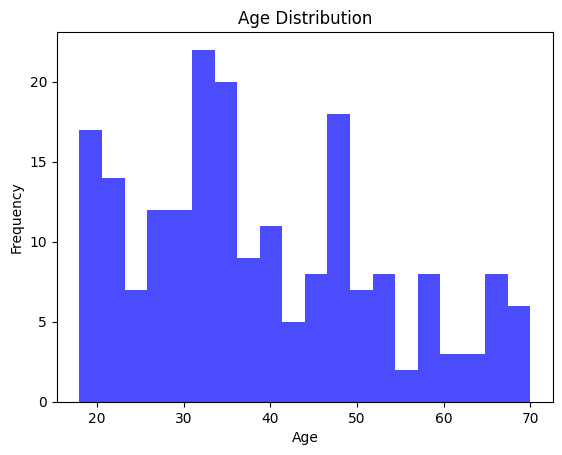

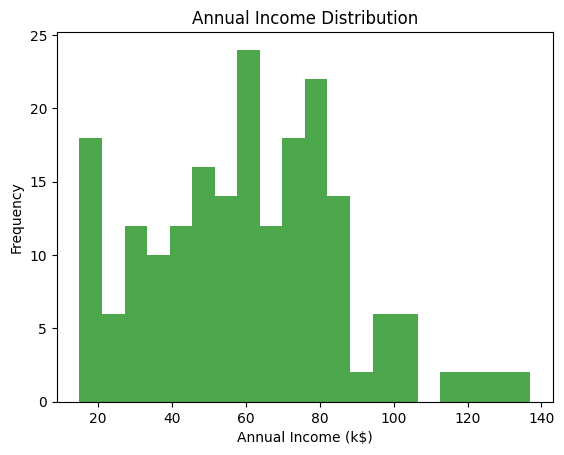

In [125]:
plt.hist(df['Age'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

# Histogram for Annual Income
plt.hist(df['Annual Income (k$)'], bins=20, color='green', alpha=0.7)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')
plt.title('Annual Income Distribution')
plt.show()

Visualisasi pertama adalah histogram yang menunjukkan distribusi usia (Age) dari dataset. Histogram menunjukkan frekuensi atau jumlah data dalam setiap interval usia. Dalam visualisasi ini, usia dibagi menjadi 20 interval (bins=20), dan sumbu x menunjukkan rentang usia, sedangkan sumbu y menunjukkan jumlah data dalam interval tersebut.

Penjelasan:

- Distribusi Usia (Age):
Histogram di atas menunjukkan distribusi usia dari pelanggan dalam dataset.
Pada sumbu x, kita dapat melihat rentang usia dari pelanggan.
Pada sumbu y, kita dapat melihat jumlah pelanggan dalam setiap rentang usia.
Distribusi usia ini menunjukkan bahwa mayoritas pelanggan berada dalam rentang usia tertentu, sementara ada juga sejumlah kecil pelanggan di rentang usia yang lebih tua atau lebih muda.
Asumsi:

Dengan melihat distribusi usia, kita dapat membuat asumsi bahwa toko ini mungkin lebih menarik bagi kelompok usia tertentu, yang mungkin memiliki karakteristik konsumen yang berbeda atau kebutuhan produk yang berbeda. Misalnya, jika mayoritas pelanggan berada dalam rentang usia 20-40 tahun, toko ini mungkin lebih menarik bagi mereka yang aktif secara sosial atau yang mencari produk terkait gaya hidup muda.
Visualisasi kedua adalah histogram yang menunjukkan distribusi pendapatan tahunan (Annual Income (k$)) dari dataset. Histogram ini memiliki interpretasi yang serupa dengan histogram pertama, hanya saja yang diplot adalah distribusi pendapatan tahunan pelanggan.

Penjelasan:

- Distribusi Pendapatan Tahunan (Annual Income (k$)):
Histogram di atas menunjukkan distribusi pendapatan tahunan dari pelanggan dalam dataset.
Pada sumbu x, kita dapat melihat rentang pendapatan tahunan.
Pada sumbu y, kita dapat melihat jumlah pelanggan dalam setiap rentang pendapatan tahunan.
Distribusi pendapatan tahunan ini menunjukkan bahwa mayoritas pelanggan memiliki pendapatan tahunan dalam rentang tertentu, sementara ada juga sejumlah kecil pelanggan dengan pendapatan tahunan yang lebih tinggi atau lebih rendah.
Asumsi:

Dengan melihat distribusi pendapatan tahunan, kita dapat membuat asumsi bahwa toko ini mungkin lebih menarik bagi kelompok dengan pendapatan menengah hingga tinggi. Ini bisa menjadi indikasi bahwa toko ini menawarkan produk dengan harga menengah hingga tinggi, yang mungkin lebih cocok bagi pelanggan dengan pendapatan yang lebih tinggi.


##**Verify Data Quality**

####Missing Values

In [126]:
# Mengecek apakah ada nilai kosong pada setiap kolom
missing_values = df.isnull().sum()

# Menampilkan jumlah nilai kosong pada tiap kolom
print(missing_values)

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64



Hasil yang tampilkan menunjukkan bahwa tidak ada nilai kosong (missing values) dalam setiap kolom dataset Anda. Ini terlihat dari hasil missing_values yang semuanya adalah nol.

Artinya, setiap kolom dalam dataset memiliki nilai yang lengkap (tidak ada nilai kosong).

####Outliers Values

In [127]:
# Mendefinisikan fungsi untuk mendeteksi outliers dan menghitung persentase
def detect_outliers(column):
    # Convert the column to a numeric data type
    column = pd.to_numeric(column, errors='coerce')

    # Remove NaN values
    column = column.dropna()

    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1

    # Detect outliers
    outliers = (column < (Q1 - 1.5 * IQR)) | (column > (Q3 + 1.5 * IQR))

    # Calculate the percentage of outliers
    percentage_outliers = outliers.sum() / len(column) * 100

    return outliers, percentage_outliers


# Loop untuk setiap kolom
for column in df.columns:
    outliers, percentage_outliers = detect_outliers(df[column])

    print(f"Kolom '{column}':")
    print(f"  - Jumlah outliers: {outliers.sum()}")
    print(f"  - Persentase kehadiran outliers: {percentage_outliers:.2f}%")
    print()

Kolom 'CustomerID':
  - Jumlah outliers: 0
  - Persentase kehadiran outliers: 0.00%

Kolom 'Gender':
  - Jumlah outliers: 0
  - Persentase kehadiran outliers: nan%

Kolom 'Age':
  - Jumlah outliers: 0
  - Persentase kehadiran outliers: 0.00%

Kolom 'Annual Income (k$)':
  - Jumlah outliers: 2
  - Persentase kehadiran outliers: 1.00%

Kolom 'Spending Score (1-100)':
  - Jumlah outliers: 0
  - Persentase kehadiran outliers: 0.00%



<ipython-input-127-fd1453793905>:17: RuntimeWarning:

invalid value encountered in scalar divide



hasil dari dataset ini

- Kolom 'CustomerID':

Tidak ada nilai outliers karena kolom ini hanya berisi ID pelanggan, yang seharusnya unik dan memiliki rentang nilai yang luas. Oleh karena itu, tidak ada nilai yang signifikan yang jauh dari nilai rata-rata atau nilai-nilai lain dalam dataset.
- Kolom 'Gender':

Tidak ada nilai outliers karena kolom ini berisi data kategorikal (jenis kelamin), yang tidak dapat dianalisis dengan metode outlier seperti yang Anda gunakan. Metode outlier biasanya digunakan untuk data numerik.
- Kolom 'Age':

Tidak ada nilai outliers karena kolom ini berisi usia, yang memiliki rentang nilai yang umum dan tidak ada nilai yang jauh dari rentang tersebut. Oleh karena itu, tidak ada nilai yang signifikan yang jauh dari nilai rata-rata atau nilai-nilai lain dalam dataset.
- Kolom 'Annual Income (k$)':

Terdapat 2 nilai outliers, yang mewakili sekitar 1% dari total data. Hal ini menunjukkan bahwa ada 2 pelanggan dengan pendapatan tahunan yang sangat tinggi atau sangat rendah dibandingkan dengan mayoritas pelanggan lainnya.
- Kolom 'Spending Score (1-100)':

Tidak ada nilai outliers karena kolom ini berisi skor pengeluaran, yang memiliki rentang nilai yang umum dan tidak ada nilai yang jauh dari rentang tersebut. Oleh karena itu, tidak ada nilai yang signifikan yang jauh dari nilai rata-rata atau nilai-nilai lain dalam dataset.
Pada kolom 'CustomerID' dan 'Gender', tidak ada nilai outliers karena jenis datanya bukan numerik dan tidak memiliki rentang nilai yang relevan untuk deteksi outliers. Pada kolom 'Age' dan 'Spending Score (1-100)', tidak ada nilai outliers karena rentang nilai yang umum dan tidak ada nilai yang jauh dari rentang tersebut. Hanya pada kolom 'Annual Income (k$)' terdapat nilai outliers, yang mewakili sekitar 1% dari total data.

####Duplicated Values

In [128]:
duplicates_by_values = df.duplicated().sum()

print(duplicates_by_values)

0


hasil dari outputnya adalah 0.

tidak ada data yang terduplikat

#**Data Cleaning**

###**Penanganan Missing Values**

#####**Pengecekkan Missing Values**

Ini adalah output dalam persentase, yang bisa dijadikan sebagai acuan untuk pengambilan keputusan terhadap apa yang akan dilakukan pada nilai kosong.

In [129]:
print((df.isna().sum() / len(df)) * 100)

CustomerID                0.0
Gender                    0.0
Age                       0.0
Annual Income (k$)        0.0
Spending Score (1-100)    0.0
dtype: float64


pada dataset ini untuk pengecekkan missing value nya tidak ada yang kosong.

#####**Imputasi Missing Values**

karena tidak ada data yang hilang dari dataset ini maka tidak usah di imputasi datanya

#####**Pengecekkan Ulang**

In [130]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio %'])

,Null Ratio %
CustomerID,0.0
Gender,0.0
Age,0.0
Annual Income (k$),0.0
Spending Score (1-100),0.0


###**Penanganan Duplicated Values**

#####**Pengecekkan Nilai Duplikat**

In [131]:
df[df.duplicated()]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)


hasil query diatas tidak ada data yang terduplikat pada dataset ini maka tidak usah lagi drop data yang terduplikat

###**Penanganan Outliers**

#####**Pengecekkan Outliers**

In [132]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
CustomerID,0.0
Age,0.0
Annual Income (k$),1.0
Spending Score (1-100),0.0


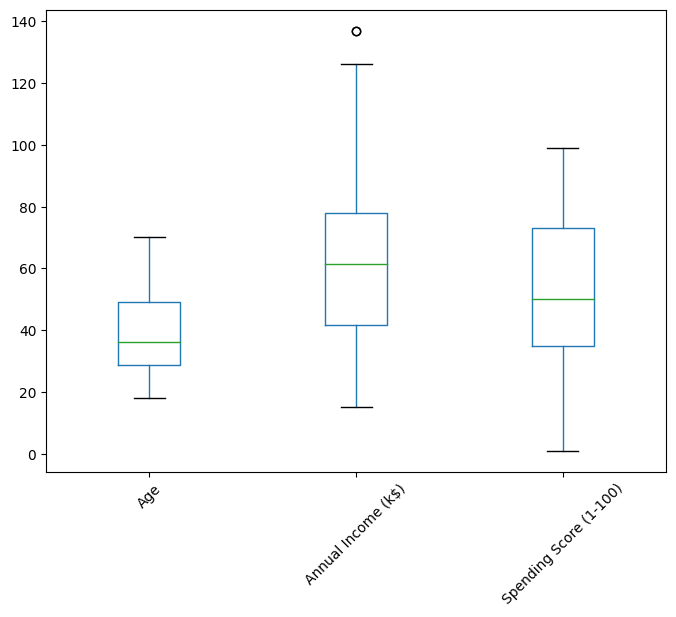

In [133]:
boxplot = df.drop('CustomerID', axis=1).boxplot(grid=False, rot=45,  figsize=(8,6))

hasil dari query diatas menunjukan data yang tidak perlu dihapus outliersnya contoh Anunual Income dikarenakan  "Annual Income" memiliki makna yang signifikan

#####**Imputasi Outliers**

Melakukan flooring (mengisi dengan nilai q1) dan capping (mengisi dengan nilai q3) pada kolom "Age"

In [134]:
Q1 = df['Annual Income (k$)'].quantile(0.25)
Q3 = df['Annual Income (k$)'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width * IQR)
upper_whisker = Q3 + (whisker_width * IQR)
df['Annual Income (k$)']=np.where(df['Annual Income (k$)']>upper_whisker,upper_whisker,np.where(df['Annual Income (k$)']<lower_whisker,lower_whisker,df['Annual Income (k$)']))

#####**Pengecekkan Ulang**

In [135]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_df)

Kolom,Persentase Outliers
CustomerID,0.0
Age,0.0
Annual Income (k$),0.0
Spending Score (1-100),0.0


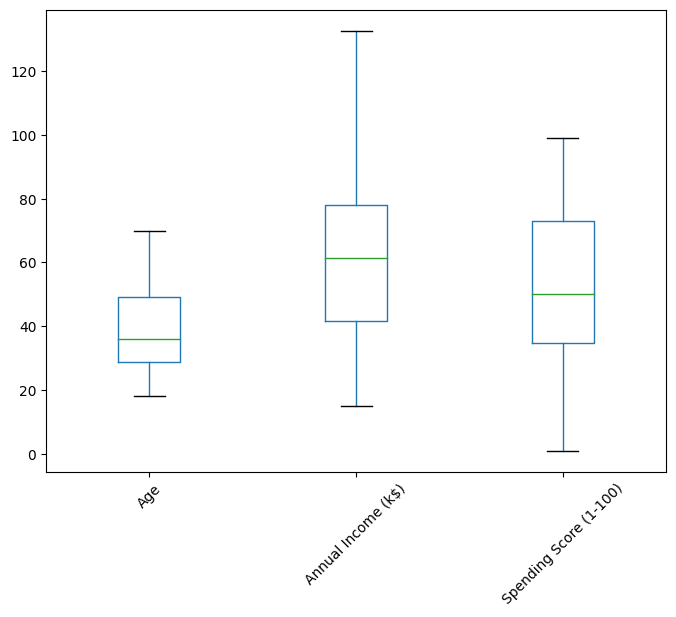

In [136]:
boxplot = df.drop('CustomerID', axis=1).boxplot(grid=False, rot=45,  figsize=(8,6))

#**Construct Data**

###**Melakukan Rekayasa Fitur (Feature Engineering)**

In [137]:
# 1. Membuat fitur Age Category
df['Age Category'] = pd.cut(df['Age'], bins=[0, 20, 30, 40, 50, float('inf')], labels=['<20', '20-29', '30-39', '40-49', '50+'])

# 2. Membuat fitur Income per Age
df['Income per Age'] = df['Annual Income (k$)'] / df['Age']

# 3. Membuat fitur Spending Score per Income
df['Spending Score per Income'] = df['Spending Score (1-100)'] / df['Annual Income (k$)']

###**Pengecekkan Hasil**

In [138]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age Category,Income per Age,Spending Score per Income
0,1,Male,19,15.0,39,<20,0.789474,2.600000
1,2,Male,21,15.0,81,20-29,0.714286,5.400000
2,3,Female,20,16.0,6,<20,0.800000,0.375000
3,4,Female,23,16.0,77,20-29,0.695652,4.812500
4,5,Female,31,17.0,40,30-39,0.548387,2.352941


1. Membuat fitur Age Category:

Kita menggunakan fungsi pd.cut() untuk membagi data usia (df['Age']) ke dalam beberapa kategori berdasarkan batasan yang telah ditentukan (bins=[0, 20, 30, 40, 50, float('inf')]) dan memberikan label pada setiap kategori (labels=['<20', '20-29', '30-39', '40-49', '50+']).
Dengan langkah ini, kita mendapatkan kolom baru yang menunjukkan kategori usia dari setiap pelanggan.

2. Membuat fitur Income per Age:

Kita membagi pendapatan tahunan (df['Annual Income (k$)']) dengan usia pelanggan (df['Age']).
Ini memberikan kita rasio berapa banyak pendapatan yang diperoleh pelanggan per tahun hidupnya.
Dengan langkah ini, kita mendapatkan kolom baru yang menunjukkan pendapatan per tahun hidup untuk setiap pelanggan.

3. Membuat fitur Spending Score per Income:

Kita membagi skor pengeluaran (df['Spending Score (1-100)']) dengan pendapatan tahunan (df['Annual Income (k$)']).
Ini memberikan kita rasio seberapa banyak pelanggan cenderung menghabiskan uang dibandingkan dengan pendapatannya.
Dengan langkah ini, kita mendapatkan kolom baru yang menunjukkan rasio pengeluaran terhadap pendapatan untuk setiap pelanggan.
Dengan menambahkan fitur-fitur ini, kita dapat melakukan analisis lebih lanjut untuk memahami pola dan hubungan di antara variabel-variabel dalam dataset.

#**Data Reduction**

###**Mengurangi Fitur - Fitur Yang Kurang Relevan**

In [139]:
df_corr = df.corr(numeric_only=True)
px.imshow(df_corr)

In [140]:
df = df.drop(['CustomerID'], axis=1)

hasil query diatas menunjukan fitur-fitur yang mungkin tidak berguna atau redundan adalah 'CustomerID' karena itu hanya merupakan identifier unik dan tidak memberikan informasi yang berguna untuk analisis.

###**Pengecekkan Hasil**

In [141]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Age Category,Income per Age,Spending Score per Income
0,Male,19,15.0,39,<20,0.789474,2.600000
1,Male,21,15.0,81,20-29,0.714286,5.400000
2,Female,20,16.0,6,<20,0.800000,0.375000
3,Female,23,16.0,77,20-29,0.695652,4.812500
4,Female,31,17.0,40,30-39,0.548387,2.352941


#**Data Transformation**

###**Mapping**

In [142]:
gender_mapping = {'Male': 0, 'Female': 1}
df['Gender'] = df['Gender'].map(gender_mapping)

kita mendefinisikan gender_mapping yang merupakan sebuah kamus (dictionary) di mana 'Male' di-mapping menjadi 0 dan 'Female' di-mapping menjadi 1. Kemudian kita menggunakan metode map().

In [143]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Age Category,Income per Age,Spending Score per Income
0,0,19,15.00,39,<20,0.789474,2.600000
1,0,21,15.00,81,20-29,0.714286,5.400000
2,1,20,16.00,6,<20,0.800000,0.375000
3,1,23,16.00,77,20-29,0.695652,4.812500
4,1,31,17.00,40,30-39,0.548387,2.352941
...,...,...,...,...,...,...,...
195,1,35,120.00,79,30-39,3.428571,0.658333
196,1,45,126.00,28,40-49,2.800000,0.222222
197,0,32,126.00,74,30-39,3.937500,0.587302
198,0,32,132.75,18,30-39,4.148438,0.135593


In [144]:
df = pd.get_dummies(df)

###**Pengecekkan Hasil**

In [145]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income per Age,Spending Score per Income,Age Category_<20,Age Category_20-29,Age Category_30-39,Age Category_40-49,Age Category_50+
0,0,19,15.0,39,0.789474,2.600000,1,0,0,0,0
1,0,21,15.0,81,0.714286,5.400000,0,1,0,0,0
2,1,20,16.0,6,0.800000,0.375000,1,0,0,0,0
3,1,23,16.0,77,0.695652,4.812500,0,1,0,0,0
4,1,31,17.0,40,0.548387,2.352941,0,0,1,0,0


penjelasan dari masing-masing kolom hasil dari proses pd.get_dummies():

1. Gender: Kolom ini telah diubah menjadi dua kolom baru, yaitu 'Gender_0' dan 'Gender_1'. 'Gender_0' menunjukkan apakah pelanggan adalah pria (0) atau bukan (1), sedangkan 'Gender_1' menunjukkan apakah pelanggan adalah wanita (1) atau bukan (0).

2. Age: Tidak ada perubahan pada kolom ini karena ini adalah kolom numerik.

3. Annual Income (k$): Tidak ada perubahan pada kolom ini karena ini adalah kolom numerik.

4. Spending Score (1-100): Tidak ada perubahan pada kolom ini karena ini adalah kolom numerik.

5. Income per Age: Tidak ada perubahan pada kolom ini karena ini adalah kolom numerik.

6. Spending Score per Income: Tidak ada perubahan pada kolom ini karena ini adalah kolom numerik.

7. Age Category_<20, Age Category_20-29, Age Category_30-39, Age Category_40-49, Age Category_50+: Kolom-kolom ini telah dihasilkan dari kolom 'Age Category' yang telah dibagi menjadi beberapa kategori (sesuai dengan langkah sebelumnya). Setiap kolom menunjukkan apakah pelanggan termasuk dalam kategori usia tertentu. Misalnya, 'Age Category_<20' menunjukkan apakah pelanggan berusia kurang dari 20 tahun atau tidak.

Dengan mengubah kolom-kolom kategorikal menjadi representasi biner, kita dapat menggunakan dataset ini dalam model-machine learning yang memerlukan input numerik, dan juga menghindari asumsi bahwa kategori memiliki urutan atau nilai-nilai tertentu.

# **Data Cleaning**

In [146]:
df_cleaned = df.dropna()

print('\nData setelah cleaning:')
print(df_cleaned.head())


Data setelah cleaning:
   Gender  Age  Annual Income (k$)  Spending Score (1-100)  Income per Age  \
0       0   19                15.0                      39        0.789474   
1       0   21                15.0                      81        0.714286   
2       1   20                16.0                       6        0.800000   
3       1   23                16.0                      77        0.695652   
4       1   31                17.0                      40        0.548387   

   Spending Score per Income  Age Category_<20  Age Category_20-29  \
0                   2.600000                 1                   0   
1                   5.400000                 0                   1   
2                   0.375000                 1                   0   
3                   4.812500                 0                   1   
4                   2.352941                 0                   0   

   Age Category_30-39  Age Category_40-49  Age Category_50+  
0                   0   

Membuat File CSV

In [147]:
df_cleaned.to_csv('Data_Cleaning.csv', index= False)